<a href="https://colab.research.google.com/github/jcampuzano1111/KNN-Classifier/blob/main/KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

sns.set(style="whitegrid", context="talk")

plt.rcParams["font.size"] = 12          # base font size
plt.rcParams["axes.titlesize"] = 14     # title font
plt.rcParams["axes.labelsize"] = 12     # x/y label font
plt.rcParams["xtick.labelsize"] = 10    # x tick labels
plt.rcParams["ytick.labelsize"] = 10    # y tick labels
plt.rcParams["legend.fontsize"] = 10    # legend

df = pd.read_csv("/content/drive/MyDrive/Collab/KNN Project/ecommerce_customer_behavior_dataset_v2.csv")

In [108]:
df.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_000001-1,CUST_00001,2023-05-29,40,Male,Ankara,Books,29.18,1,0.00,29.18,Digital Wallet,Mobile,14,9,True,13,4
1,ORD_000001-2,CUST_00001,2023-10-12,40,Male,Ankara,Home & Garden,644.40,1,138.05,506.35,Credit Card,Desktop,14,8,True,6,2
2,ORD_000001-3,CUST_00001,2023-12-05,40,Male,Ankara,Sports,332.82,5,0.00,"1,664.10",Credit Card,Mobile,15,10,True,9,4
3,ORD_000002-1,CUST_00002,2023-05-11,33,Male,Istanbul,Food,69.30,5,71.05,275.45,Digital Wallet,Desktop,16,13,True,4,4
4,ORD_000002-2,CUST_00002,2023-06-16,33,Male,Istanbul,Beauty,178.15,3,0.00,534.45,Credit Card,Mobile,14,7,True,6,4


## EDA

In [109]:
df.shape

(17049, 18)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17049 entries, 0 to 17048
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  17049 non-null  object 
 1   Customer_ID               17049 non-null  object 
 2   Date                      17049 non-null  object 
 3   Age                       17049 non-null  int64  
 4   Gender                    17049 non-null  object 
 5   City                      17049 non-null  object 
 6   Product_Category          17049 non-null  object 
 7   Unit_Price                17049 non-null  float64
 8   Quantity                  17049 non-null  int64  
 9   Discount_Amount           17049 non-null  float64
 10  Total_Amount              17049 non-null  float64
 11  Payment_Method            17049 non-null  object 
 12  Device_Type               17049 non-null  object 
 13  Session_Duration_Minutes  17049 non-null  int64  
 14  Pages_

In [111]:
df["Date"]=pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Month_Name"] = df["Date"].dt.month_name()
df["Day"] = df["Date"].dt.day
df["Weekday"] = df["Date"].dt.day_name()

In [112]:
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
missing_summary = pd.DataFrame({"Missing": missing, "%": missing_pct})
print(missing_summary)

                          Missing    %
Order_ID                        0 0.00
Customer_ID                     0 0.00
Date                            0 0.00
Age                             0 0.00
Gender                          0 0.00
City                            0 0.00
Product_Category                0 0.00
Unit_Price                      0 0.00
Quantity                        0 0.00
Discount_Amount                 0 0.00
Total_Amount                    0 0.00
Payment_Method                  0 0.00
Device_Type                     0 0.00
Session_Duration_Minutes        0 0.00
Pages_Viewed                    0 0.00
Is_Returning_Customer           0 0.00
Delivery_Time_Days              0 0.00
Customer_Rating                 0 0.00
Year                            0 0.00
Month                           0 0.00
Month_Name                      0 0.00
Day                             0 0.00
Weekday                         0 0.00


In [113]:
df.isna().sum()

,0
Order_ID,0
Customer_ID,0
Date,0
Age,0
Gender,0
City,0
Product_Category,0
Unit_Price,0
Quantity,0
Discount_Amount,0


In [114]:
for col in df:
    print(col)
    print(df[col].unique())
    print("-"*110)

Order_ID
['ORD_000001-1' 'ORD_000001-2' 'ORD_000001-3' ... 'ORD_005000-2'
 'ORD_005000-3' 'ORD_005000-4']
--------------------------------------------------------------------------------------------------------------
Customer_ID
['CUST_00001' 'CUST_00002' 'CUST_00003' ... 'CUST_04998' 'CUST_04999'
 'CUST_05000']
--------------------------------------------------------------------------------------------------------------
Date
<DatetimeArray>
['2023-05-29 00:00:00', '2023-10-12 00:00:00', '2023-12-05 00:00:00',
 '2023-05-11 00:00:00', '2023-06-16 00:00:00', '2023-02-27 00:00:00',
 '2024-01-03 00:00:00', '2024-02-13 00:00:00', '2023-03-16 00:00:00',
 '2023-06-12 00:00:00',
 ...
 '2023-07-28 00:00:00', '2023-07-23 00:00:00', '2023-09-18 00:00:00',
 '2024-02-21 00:00:00', '2023-03-04 00:00:00', '2023-11-03 00:00:00',
 '2023-05-04 00:00:00', '2023-07-11 00:00:00', '2023-11-25 00:00:00',
 '2023-06-07 00:00:00']
Length: 450, dtype: datetime64[ns]
----------------------------------------------

In [115]:
df.duplicated().sum()

np.int64(0)

In [116]:
df.describe()


,Date,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating,Year,Month,Day
count,17049,"17,049.00","17,049.00","17,049.00","17,049.00","17,049.00","17,049.00","17,049.00","17,049.00","17,049.00","17,049.00","17,049.00","17,049.00"
mean,2023-08-15 01:33:09.723737344,34.95,447.90,3.01,69.79,"1,277.44",14.54,9.00,6.50,3.90,"2,023.19",5.69,15.65
min,2023-01-01 00:00:00,18.00,5.05,1.00,0.00,6.21,4.00,1.00,1.00,1.00,"2,023.00",1.00,1.00
25%,2023-04-26 00:00:00,26.00,73.26,2.00,0.00,172.97,13.00,7.00,4.00,3.00,"2,023.00",2.00,8.00
50%,2023-08-16 00:00:00,35.00,174.68,3.00,0.00,455.85,15.00,9.00,6.00,4.00,"2,023.00",5.00,16.00
75%,2023-12-06 00:00:00,42.00,494.57,4.00,32.71,"1,267.75",17.00,11.00,8.00,5.00,"2,023.00",9.00,23.00
max,2024-03-25 00:00:00,75.00,"7,900.01",5.00,"6,538.29","37,852.05",26.00,18.00,25.00,5.00,"2,024.00",12.00,31.00
std,NaN,11.05,722.32,1.42,240.70,"2,358.44",2.93,2.26,3.49,1.13,0.39,3.62,8.72


In [117]:
# Negative or zero amounts?
df[df["Total_Amount"] <= 0].head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Year,Month,Month_Name,Day,Weekday


## Univariate analysis


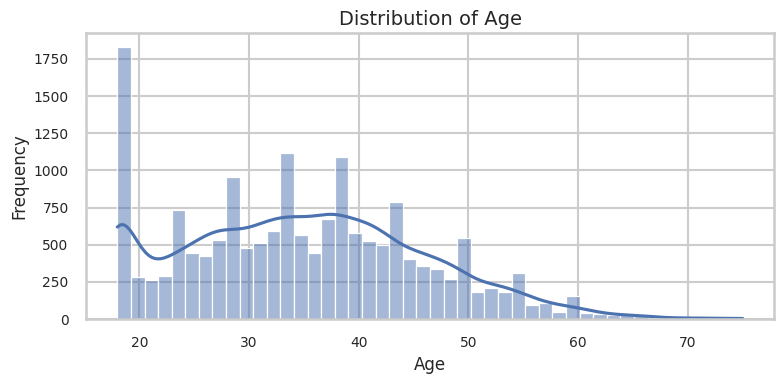

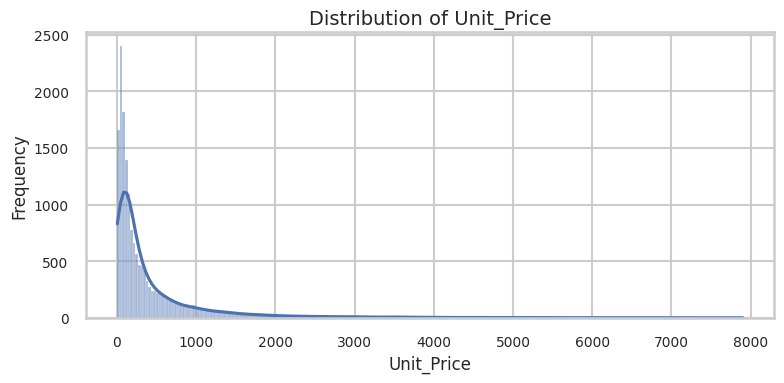

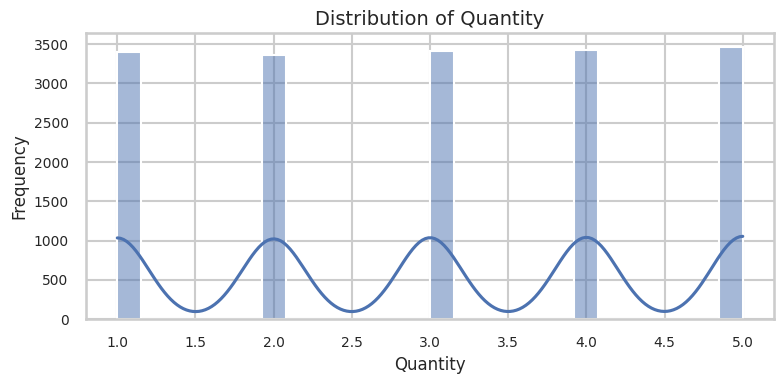

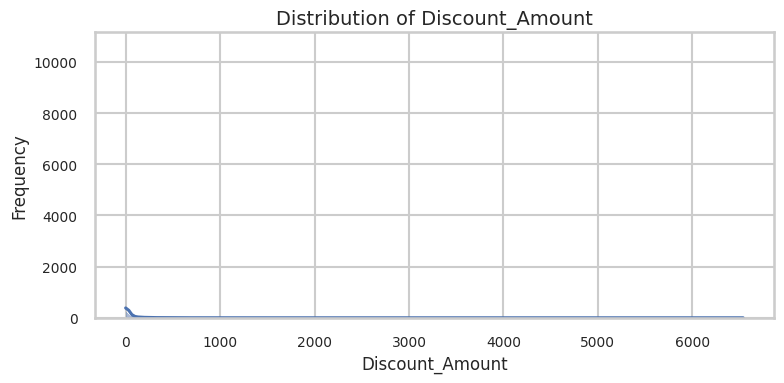

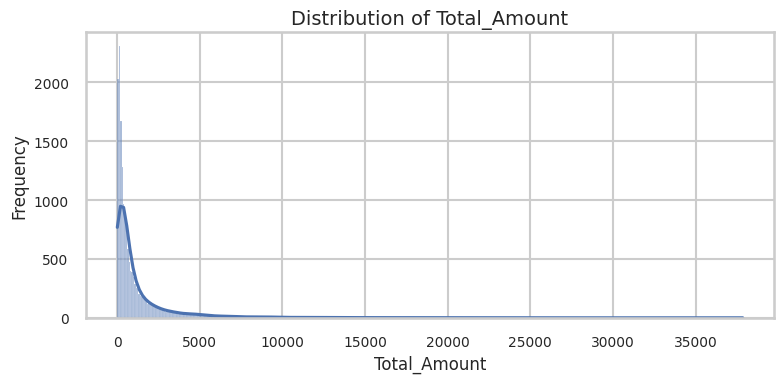

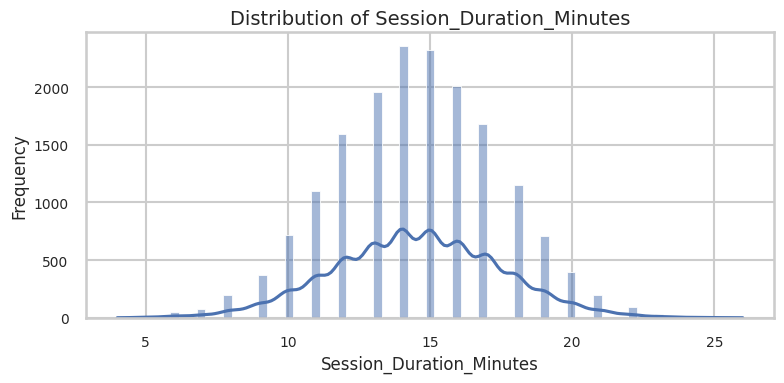

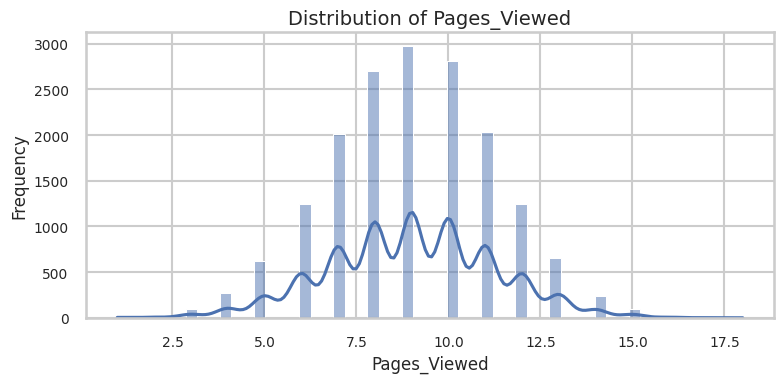

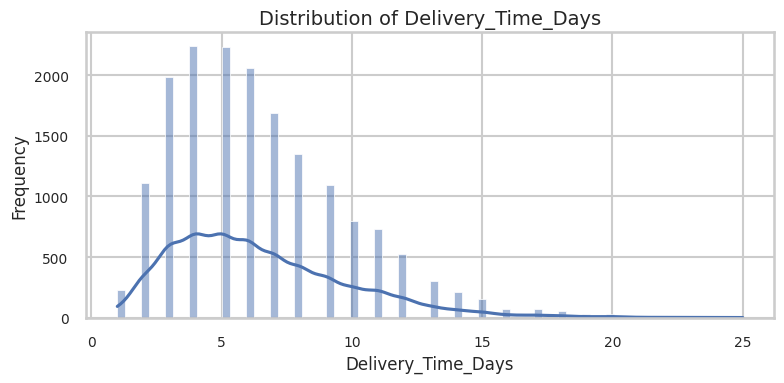

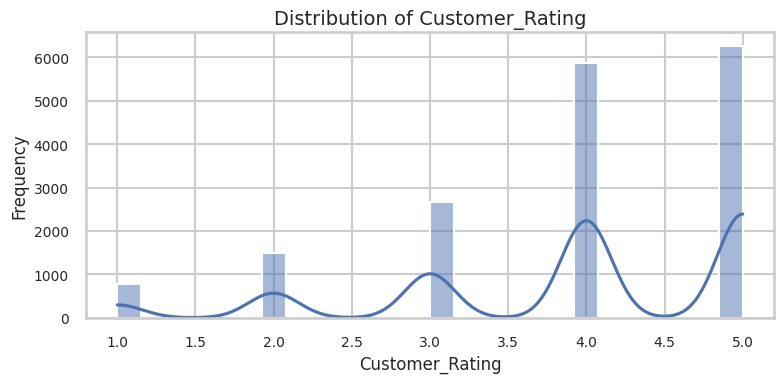

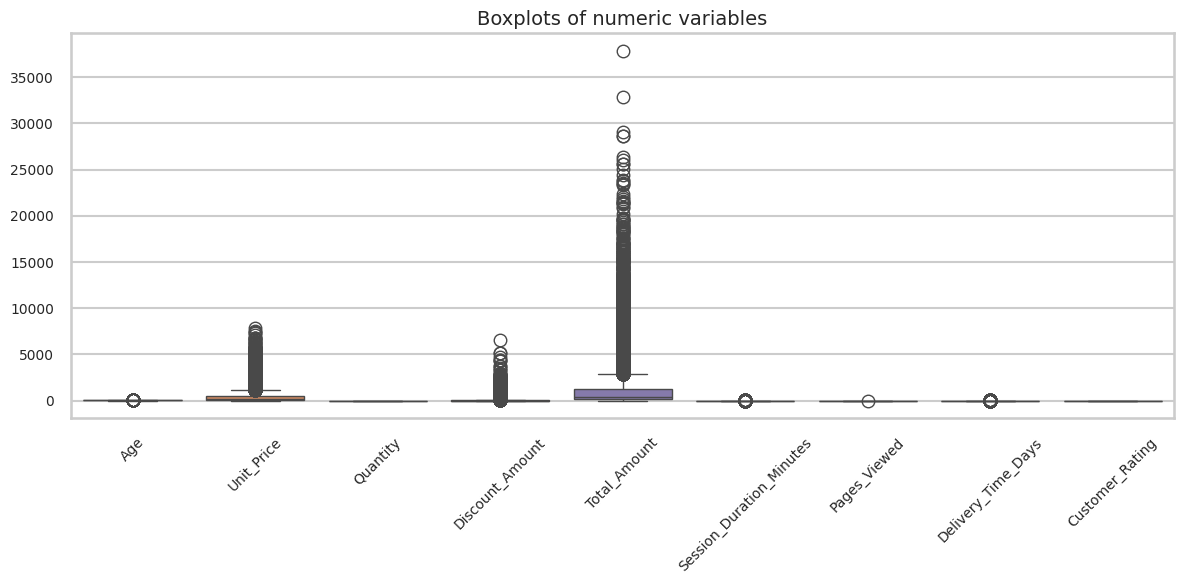

In [118]:
numeric_cols = ["Age", "Unit_Price", "Quantity", "Discount_Amount",
                "Total_Amount", "Session_Duration_Minutes",
                "Pages_Viewed", "Delivery_Time_Days", "Customer_Rating"]
# Histograms for numeric variables
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Boxplots for numeric variables (outlier detection)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots of numeric variables")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


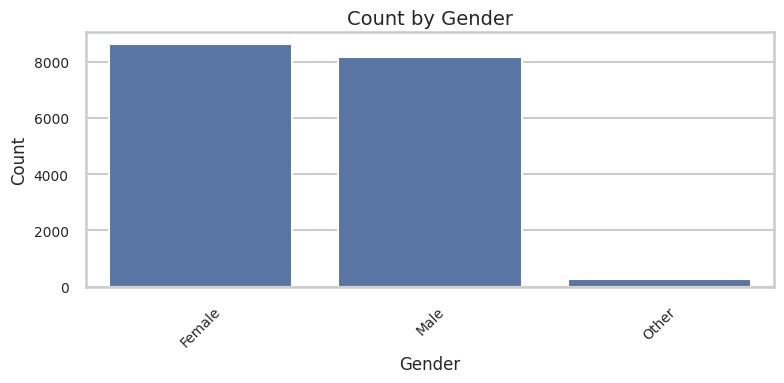

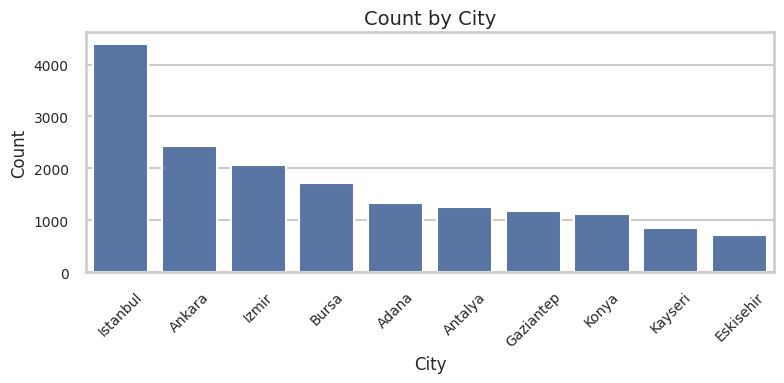

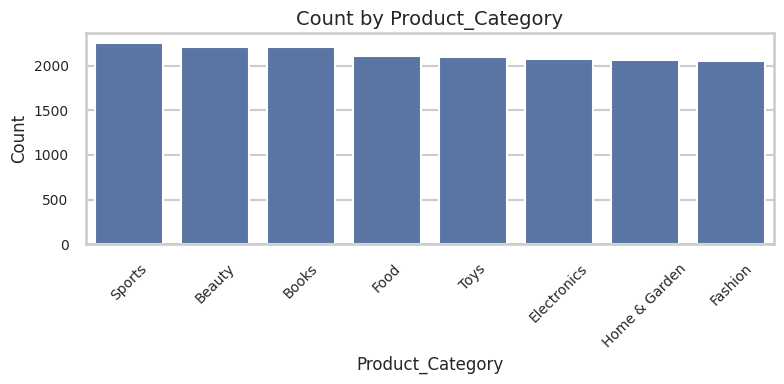

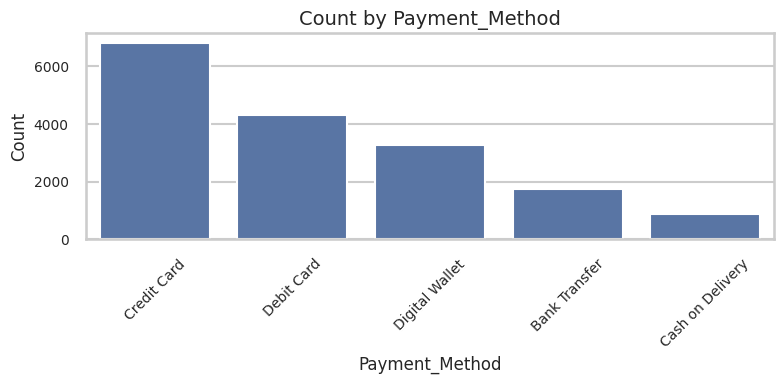

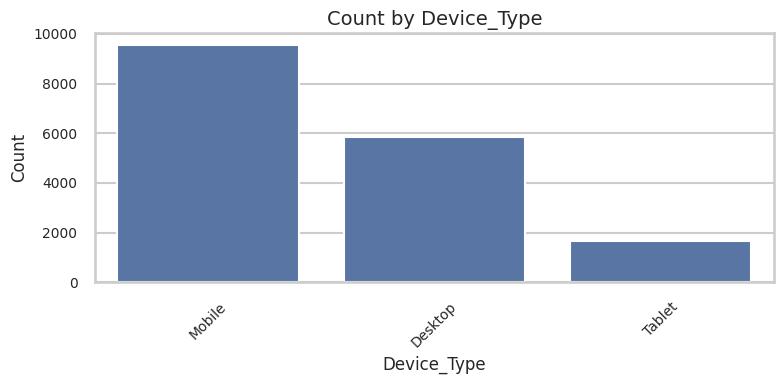

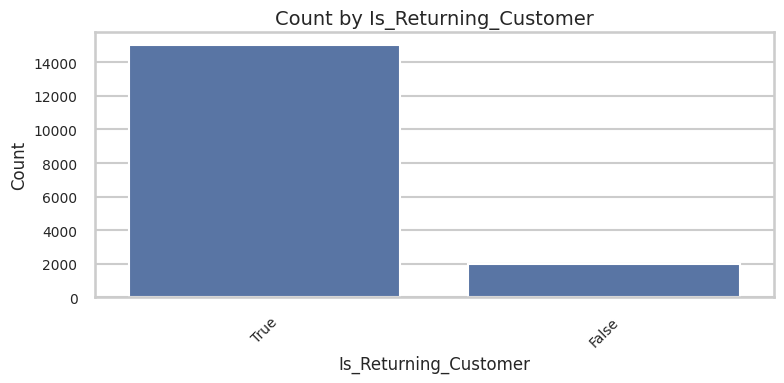

In [119]:
cat_cols = ["Gender", "City", "Product_Category", "Payment_Method",
            "Device_Type", "Is_Returning_Customer"]

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    vc = df[col].value_counts().sort_values(ascending=False)
    sns.barplot(x=vc.index.astype(str), y=vc.values)
    plt.title(f"Count by {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Bivariate analysis

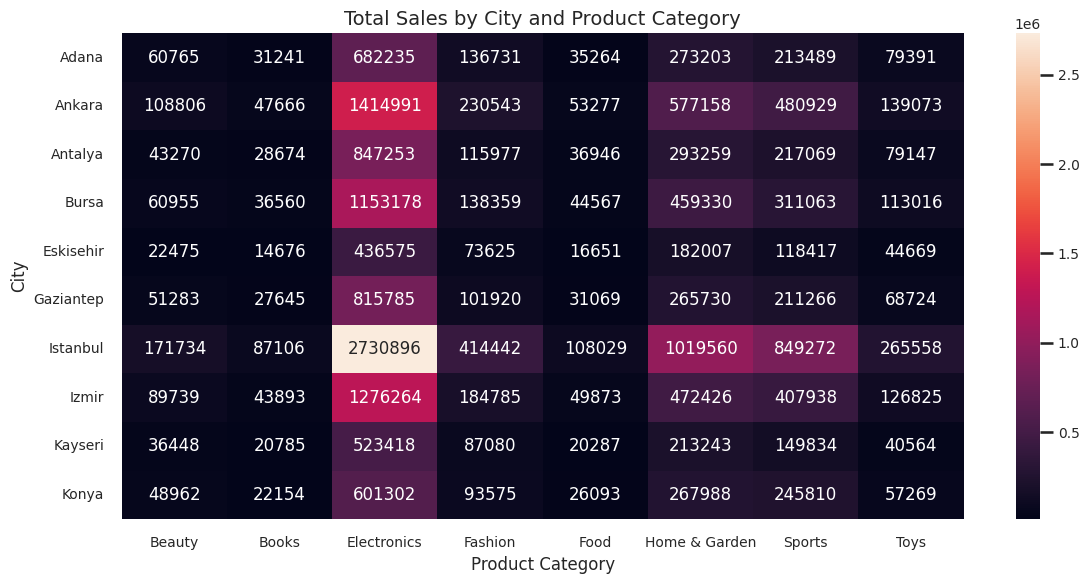

In [120]:
# Pivot table sales by city and product category
pivot_city_cat = pd.pivot_table(
    df,
    index="City",
    columns="Product_Category",
    values="Total_Amount",
    aggfunc="sum",
    fill_value=0,
    margins=True,
    margins_name="Total"
)
pivot_city_cat

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_city_cat.drop("Total", axis=1).drop("Total", axis=0),
    annot=True,
    fmt=".0f"
)
plt.title("Total Sales by City and Product Category")
plt.ylabel("City")
plt.xlabel("Product Category")
plt.tight_layout()
plt.show()


Gender
Female   11,037,984.60
Male     10,343,185.70
Other       397,882.29
Name: Total_Amount, dtype: float64


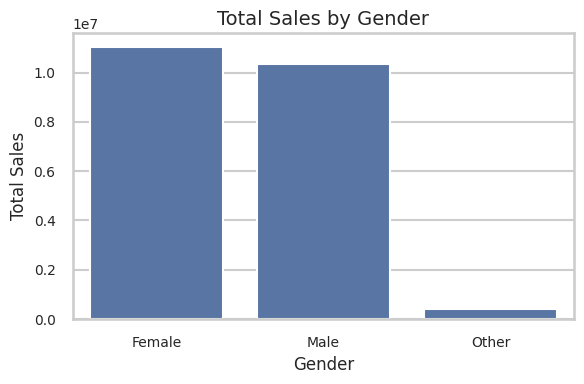

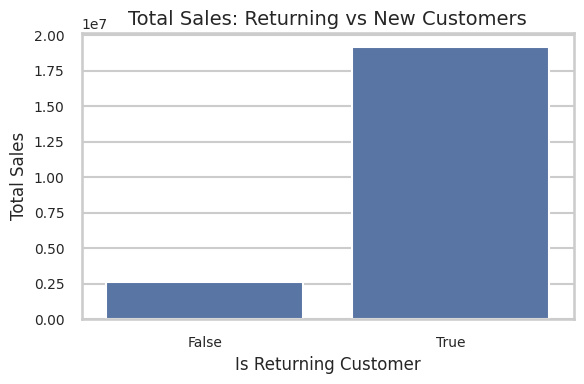

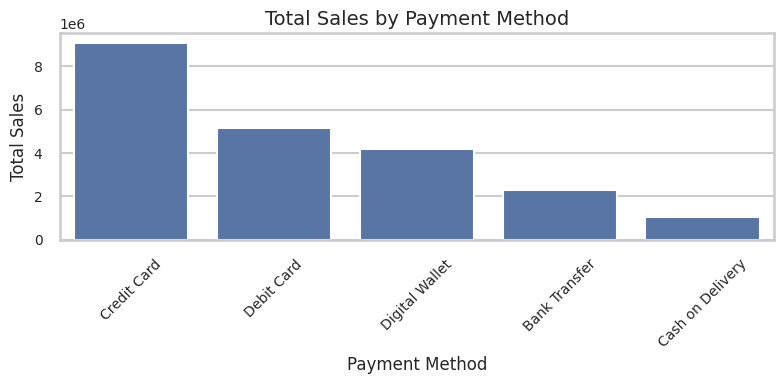

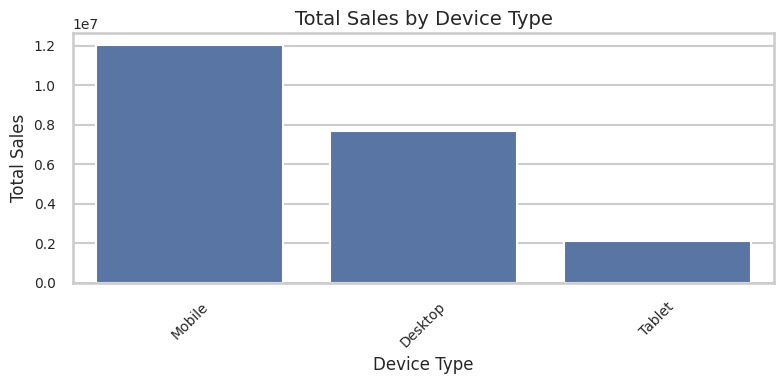

In [121]:
# Total sales by gender
sales_gender = df.groupby("Gender")["Total_Amount"].sum().sort_values(ascending=False)
print(sales_gender)

plt.figure(figsize=(6, 4))
sns.barplot(x=sales_gender.index, y=sales_gender.values)
plt.title("Total Sales by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

# Total sales by returning vs new customer
sales_returning = df.groupby("Is_Returning_Customer")["Total_Amount"].sum()
plt.figure(figsize=(6, 4))
sns.barplot(x=sales_returning.index.astype(str), y=sales_returning.values)
plt.title("Total Sales: Returning vs New Customers")
plt.xlabel("Is Returning Customer")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

# Sales by payment method
sales_payment = df.groupby("Payment_Method")["Total_Amount"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=sales_payment.index, y=sales_payment.values)
plt.title("Total Sales by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sales by device type
sales_device = df.groupby("Device_Type")["Total_Amount"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=sales_device.index, y=sales_device.values)
plt.title("Total Sales by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


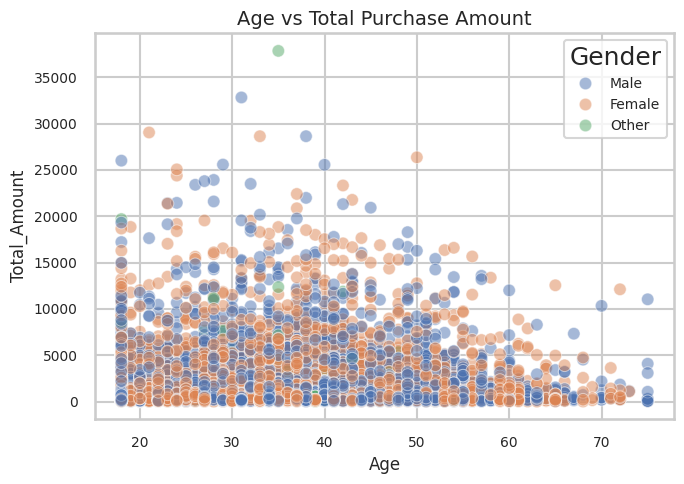

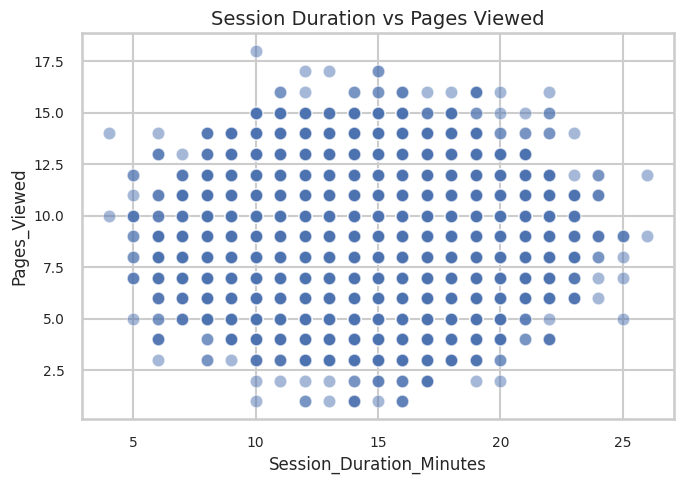

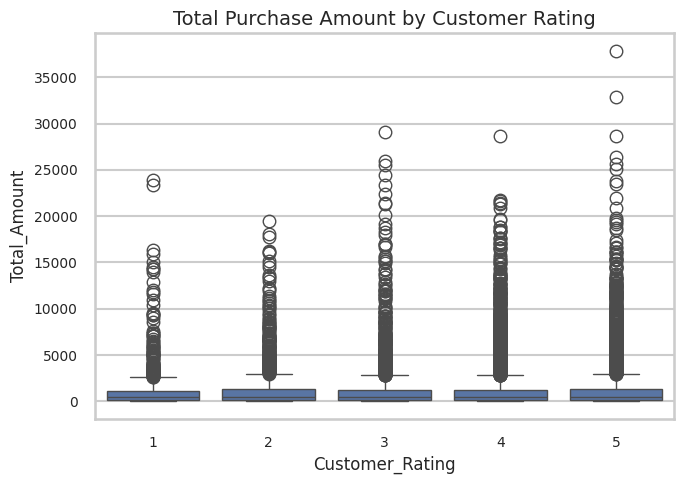

In [122]:
# Age vs Total_Amount
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="Age", y="Total_Amount", hue="Gender", alpha=0.5)
plt.title("Age vs Total Purchase Amount")
plt.tight_layout()
plt.show()

# Session duration vs pages viewed
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="Session_Duration_Minutes", y="Pages_Viewed", alpha=0.5)
plt.title("Session Duration vs Pages Viewed")
plt.tight_layout()
plt.show()

# Customer rating vs Total_Amount
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="Customer_Rating", y="Total_Amount")
plt.title("Total Purchase Amount by Customer Rating")
plt.tight_layout()
plt.show()


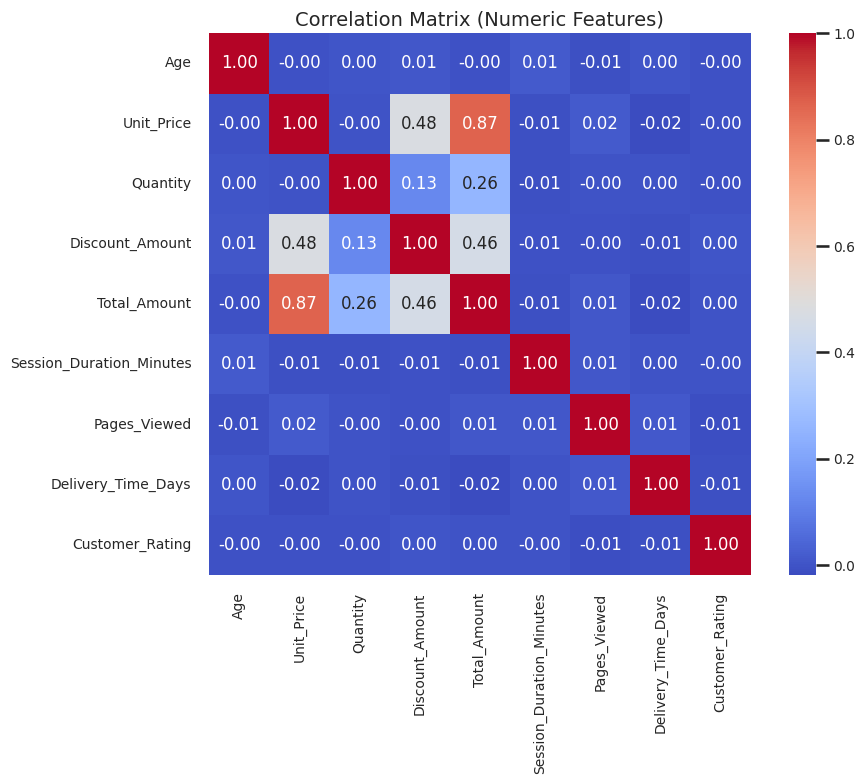

In [123]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix (Numeric Features)")
plt.tight_layout()
plt.show()


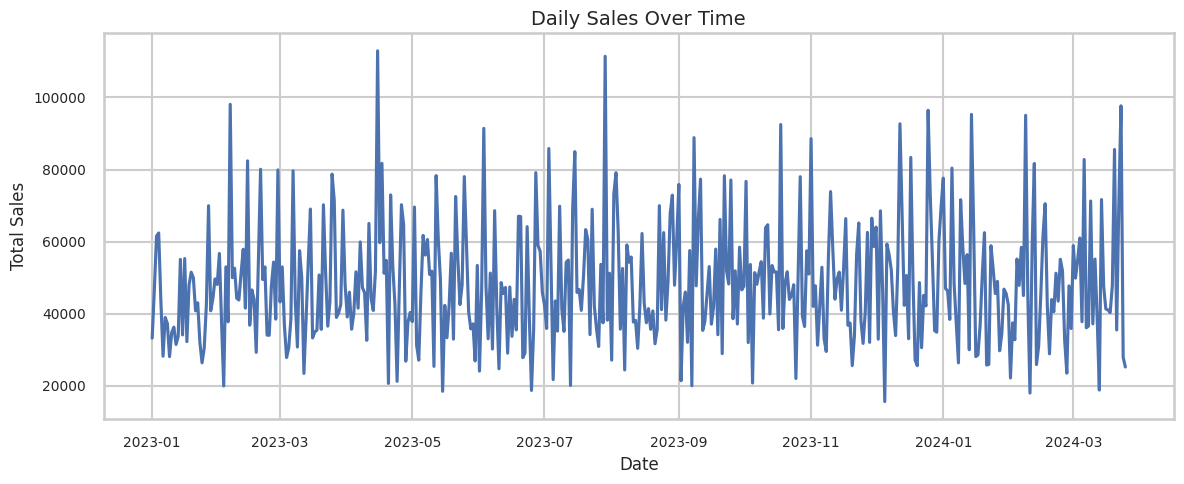

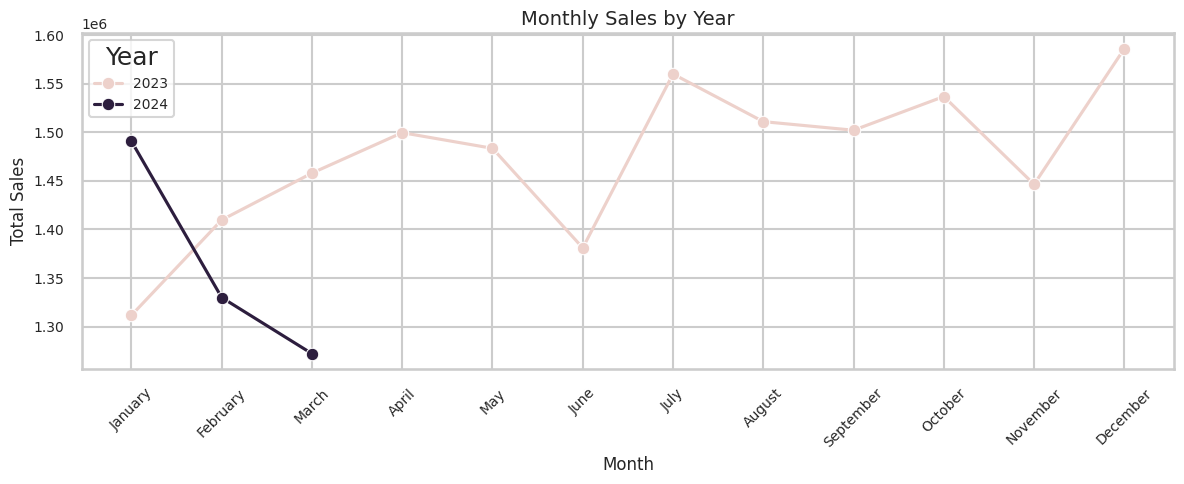

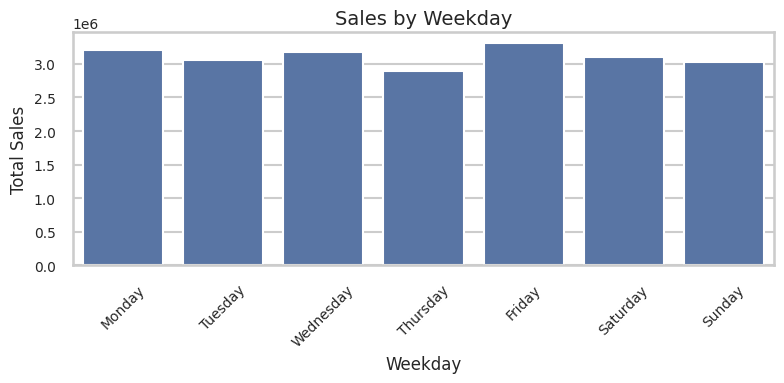

In [124]:
# Sales over time (daily)
daily_sales = df.groupby("Date")["Total_Amount"].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_sales, x="Date", y="Total_Amount")
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

# Sales by month
monthly_sales = df.groupby(["Year", "Month_Name"])["Total_Amount"].sum().reset_index()

# To keep month order correct:
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
monthly_sales["Month_Name"] = pd.Categorical(monthly_sales["Month_Name"],
                                             categories=month_order,
                                             ordered=True)
monthly_sales = monthly_sales.sort_values(["Year", "Month_Name"])

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x="Month_Name", y="Total_Amount", hue="Year", marker="o")
plt.title("Monthly Sales by Year")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sales by weekday
weekday_sales = df.groupby("Weekday")["Total_Amount"].sum().reset_index()
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_sales["Weekday"] = pd.Categorical(weekday_sales["Weekday"],
                                          categories=weekday_order,
                                          ordered=True)
weekday_sales = weekday_sales.sort_values("Weekday")

plt.figure(figsize=(8, 4))
sns.barplot(data=weekday_sales, x="Weekday", y="Total_Amount")
plt.title("Sales by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


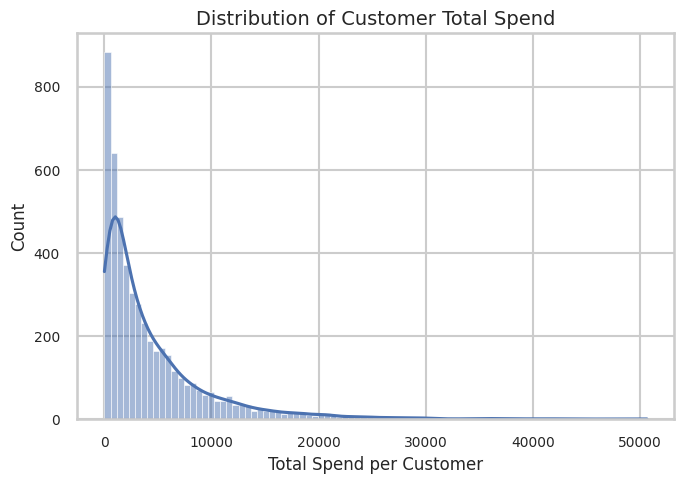

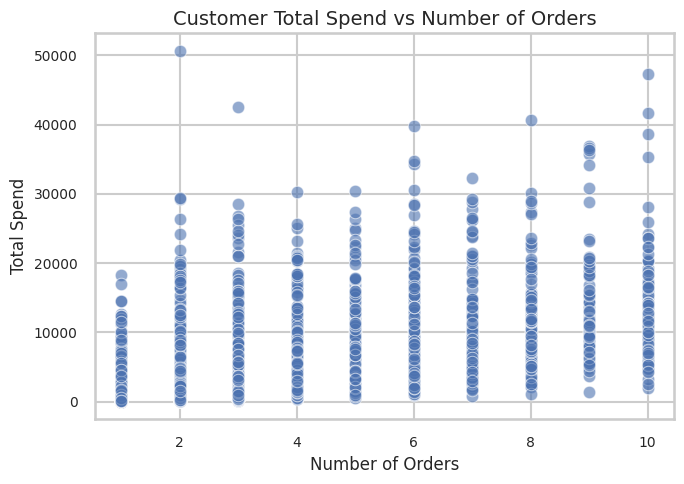

In [125]:
# Aggregate per customer
cust = df.groupby("Customer_ID").agg(
    n_orders=("Order_ID", "nunique"),
    total_spent=("Total_Amount", "sum"),
    avg_order_value=("Total_Amount", "mean"),
    avg_rating=("Customer_Rating", "mean"),
    min_date=("Date", "min"),
    max_date=("Date", "max"),
    returning=("Is_Returning_Customer", "max") ).reset_index()

cust["customer_lifetime_days"] = (cust["max_date"] - cust["min_date"]).dt.days + 1

cust.head()

# Distribution of total spent
plt.figure(figsize=(7, 5))
sns.histplot(cust["total_spent"], kde=True)
plt.title("Distribution of Customer Total Spend")
plt.xlabel("Total Spend per Customer")
plt.tight_layout()
plt.show()

# Total spent vs number of orders
plt.figure(figsize=(7, 5))
sns.scatterplot(data=cust, x="n_orders", y="total_spent", alpha=0.6)
plt.title("Customer Total Spend vs Number of Orders")
plt.xlabel("Number of Orders")
plt.ylabel("Total Spend")
plt.tight_layout()
plt.show()


In [126]:
sales_category=df.groupby("Product_Category")["Total_Amount"].sum().sort_values(ascending=False)
print(sales_category)

Product_Category
Electronics     10,481,897.65
Home & Garden    4,023,903.94
Sports           3,205,086.99
Fashion          1,577,035.70
Toys             1,014,237.53
Beauty             694,437.02
Food               422,054.65
Books              360,399.11
Name: Total_Amount, dtype: float64


In [127]:
sales_city=df.groupby("City")["Total_Amount"].sum().sort_values(ascending=False)
print(sales_city)

City
Istanbul    5,646,595.78
Ankara      3,052,443.10
Izmir       2,651,743.92
Bursa       2,317,028.10
Antalya     1,661,594.15
Gaziantep   1,573,422.25
Adana       1,512,320.19
Konya       1,363,152.80
Kayseri     1,091,658.53
Eskisehir     909,093.77
Name: Total_Amount, dtype: float64


In [128]:
sales_gender=df.groupby("Gender")["Total_Amount"].sum().sort_values(ascending=False)
print(sales_gender)

Gender
Female   11,037,984.60
Male     10,343,185.70
Other       397,882.29
Name: Total_Amount, dtype: float64


In [129]:
pivot_sales = pd.pivot_table(
    df,
    index="City",                # rows
    columns="Product_Category",  # columns
    values="Total_Amount",       # what we're aggregating = sales
    aggfunc="sum",               # total sales
    fill_value=0                 # replace NaN with 0
)

print(pivot_sales)

Product_Category     Beauty     Books  Electronics    Fashion       Food  \
City                                                                       
Adana             60,764.96 31,240.52   682,235.44 136,731.20  35,263.96   
Ankara           108,806.15 47,665.86 1,414,990.84 230,542.60  53,277.10   
Antalya           43,270.35 28,673.55   847,253.35 115,976.59  36,945.54   
Bursa             60,954.85 36,560.39 1,153,177.97 138,358.67  44,566.66   
Eskisehir         22,474.95 14,675.75   436,575.08  73,624.52  16,650.98   
Gaziantep         51,282.94 27,645.15   815,785.08 101,920.30  31,068.90   
Istanbul         171,733.51 87,105.76 2,730,896.02 414,441.59 108,028.90   
Izmir             89,738.61 43,893.20 1,276,263.97 184,785.47  49,872.94   
Kayseri           36,448.43 20,785.27   523,417.86  87,079.82  20,286.74   
Konya             48,962.27 22,153.66   601,302.04  93,574.94  26,092.93   

Product_Category  Home & Garden     Sports       Toys  
City                           

## KNN CLASSIFIER


In [130]:
cust = df.groupby("Customer_ID").agg(
    Age=("Age", "first"),                          # age is fixed per customer
    Gender=("Gender", "first"),
    City=("City", "first"),
    Device_Type=("Device_Type", lambda x: x.mode().iat[0] if not x.mode().empty else x.iloc[0]),
    is_returning=("Is_Returning_Customer", "max"), # True if ever returning
    total_spent=("Total_Amount", "sum"),
    n_orders=("Order_ID", "nunique"),
    avg_rating=("Customer_Rating", "mean"),
    first_purchase=("Date", "min"),
    last_purchase=("Date", "max")
).reset_index()

In [131]:
cust

,Customer_ID,Age,Gender,City,Device_Type,is_returning,total_spent,n_orders,avg_rating,first_purchase,last_purchase
0,CUST_00001,40,Male,Ankara,Mobile,True,"2,199.63",3,3.33,2023-05-29,2023-12-05
1,CUST_00002,33,Male,Istanbul,Desktop,True,809.90,2,4.00,2023-05-11,2023-06-16
2,CUST_00003,42,Male,Konya,Desktop,True,"3,030.81",2,3.50,2023-02-27,2024-01-03
3,CUST_00004,53,Male,Izmir,Desktop,False,383.22,1,5.00,2024-02-13,2024-02-13
4,CUST_00005,32,Male,Ankara,Mobile,True,"2,422.73",3,3.67,2023-03-16,2023-06-21
...,...,...,...,...,...,...,...,...,...,...,...
4995,CUST_04996,34,Male,Antalya,Mobile,True,"3,001.96",4,3.00,2023-07-07,2024-02-22
4996,CUST_04997,43,Female,Adana,Mobile,True,"15,440.42",4,4.00,2023-01-31,2023-10-28
4997,CUST_04998,72,Female,Kayseri,Desktop,False,482.90,1,3.00,2023-04-27,2023-04-27
4998,CUST_04999,44,Male,Antalya,Mobile,False,137.30,1,1.00,2024-01-16,2024-01-16


In [132]:
cust["customer_lifetime_days"] = (cust["last_purchase"] - cust["first_purchase"]).dt.days + 1
cust["customer_lifetime_days"] = cust["customer_lifetime_days"].fillna(0)
cust["is_returning"] = cust["is_returning"].astype(int)   # bool → 0/1

cust.head()

,Customer_ID,Age,Gender,City,Device_Type,is_returning,total_spent,n_orders,avg_rating,first_purchase,last_purchase,customer_lifetime_days
0,CUST_00001,40,Male,Ankara,Mobile,1,"2,199.63",3,3.33,2023-05-29,2023-12-05,191
1,CUST_00002,33,Male,Istanbul,Desktop,1,809.90,2,4.00,2023-05-11,2023-06-16,37
2,CUST_00003,42,Male,Konya,Desktop,1,"3,030.81",2,3.50,2023-02-27,2024-01-03,311
3,CUST_00004,53,Male,Izmir,Desktop,0,383.22,1,5.00,2024-02-13,2024-02-13,1
4,CUST_00005,32,Male,Ankara,Mobile,1,"2,422.73",3,3.67,2023-03-16,2023-06-21,98


In [133]:
# Threshold for high value (top 25% spenders)
threshold = cust["total_spent"].quantile(0.75)

cust["high_value"] = (cust["total_spent"] >= threshold).astype(int)

cust["high_value"].value_counts()

,count
high_value,
0,3750
1,1250


In [134]:
feature_cols = [
    "Age",
    "Gender",
    "City",
    "Device_Type",
    "is_returning",
    "n_orders",
    "avg_rating",
    "customer_lifetime_days"
]

X = cust[feature_cols]
y = cust["high_value"]


In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # keep same proportion of high/standard in both sets
)


In [136]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

numeric_features = ["Age", "is_returning", "n_orders", "avg_rating", "customer_lifetime_days"]
categorical_features = ["Gender", "City", "Device_Type"]

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

knn_clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", KNeighborsClassifier())
])


In [137]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "model__n_neighbors": [3, 5, 7, 9, 11],
    "model__weights": ["uniform", "distance"],
    "model__metric": ["minkowski"]  # default (p=2 → Euclidean)
}

grid_search = GridSearchCV(
    knn_clf,
    param_grid,
    cv=5,
    scoring="f1",   # good for imbalanced high/low classes
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best CV F1:", grid_search.best_score_)


Best params: {'model__metric': 'minkowski', 'model__n_neighbors': 9, 'model__weights': 'uniform'}
Best CV F1: 0.4505022273631817


In [138]:
best_knn = grid_search.best_estimator_


In [139]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_knn.predict(X_test)

print("Classification report:\n")
print(classification_report(y_test, y_pred, target_names=["Standard", "High-value"]))

print("Confusion matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification report:

              precision    recall  f1-score   support

    Standard       0.81      0.93      0.86      1125
  High-value       0.61      0.32      0.42       375

    accuracy                           0.78      1500
   macro avg       0.71      0.63      0.64      1500
weighted avg       0.76      0.78      0.75      1500

Confusion matrix:

[[1049   76]
 [ 254  121]]


1. Overall model performance

Accuracy: 78% (1,170/1,500 correct predictions).

However, because the data is imbalanced (1,125 Standard vs 375 High-value), accuracy alone is not enough.

The macro F1-score = 0.64 shows that performance is quite uneven between the two classes.

2. Performance by segment
a) Standard customers (majority class)

Precision: 0.81
When the model predicts “Standard”, it is correct 81% of the time.

Recall: 0.93
The model correctly identifies 93% of all true Standard customers (1,049 out of 1,125).

From the confusion matrix:

True Standard = 1,125

Predicted Standard: 1,049

Misclassified as High-value: 76

👉 Interpretation: The model is very good at recognizing Standard customers and rarely mistakes them for High-value.

b) High-value customers (target segment)

Precision: 0.61
Of all customers predicted as High-value, 61% truly are High-value.

Recall: 0.32
The model correctly detects only 32% of real High-value customers (121 out of 375).
In other words, it misses about 68% of High-value customers.

From the confusion matrix:

True High-value = 375

Predicted High-value: 121

Misclassified as Standard: 254

👉 Interpretation: The model is conservative: it predicts “High-value” relatively rarely and with moderate precision, but as a result, it fails to identify most High-value customers.

3. Business implications

From a business perspective:

Good news

When the model flags someone as High-value, there is a reasonable chance (61%) they truly are a valuable customer.

The model very rarely “over-upgrades” Standard customers; only 76 Standard customers (≈7%) were misclassified as High-value.

Risk / limitation

The main problem is low recall for High-value customers (32%):

Out of 375 truly High-value customers, 254 are not recognized and are treated as Standard.

For a marketing or loyalty program, this means you would ignore most of your best customers, losing potential revenue and engagement opportunities.

So the current model is more suited to a scenario where:

“I want to be reasonably confident that those I target as High-value really are, even if I miss many others.”

If the objective is:

“I want to capture as many High-value customers as possible,”

then this recall level is insufficient.

4. Recommendations

If the business priority is better coverage of High-value customers, you should:

Increase recall for High-value (accept some drop in precision):

Use predict_proba and adjust the classification threshold to label more customers as High-value.

Evaluate precision–recall curves specifically for the High-value class.

Address class imbalance:

Try resampling techniques (oversample High-value, undersample Standard) or

Use models that allow class weights (e.g., logistic regression, tree-based models with class_weight).

Engineer additional features:

Add recency (days since last purchase),

Frequency over different time windows,

Product mix, device behavior, etc., to give the model more signal to discriminate High-value customers.

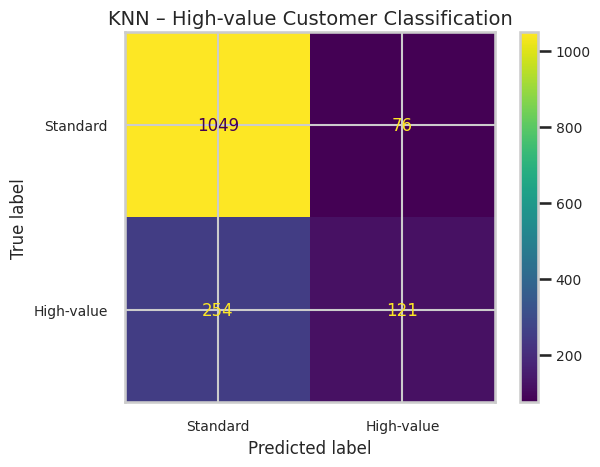

In [140]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Standard", "High-value"])
disp.plot(values_format="d")
plt.title("KNN – High-value Customer Classification")
plt.show()


In [141]:
results = cust.loc[X_test.index, ["Customer_ID", "total_spent", "high_value"]].copy()
results["predicted_high_value"] = y_pred

# See some examples
results.head(20)


,Customer_ID,total_spent,high_value,predicted_high_value
687,CUST_00688,"3,597.83",0,0
4473,CUST_04474,"2,877.22",0,0
2754,CUST_02755,"1,329.29",0,0
3982,CUST_03983,"14,373.13",1,0
468,CUST_00469,"15,782.27",1,1
4984,CUST_04985,"2,999.17",0,1
2653,CUST_02654,"1,699.71",0,0
4801,CUST_04802,934.93,0,0
3097,CUST_03098,"9,100.40",1,0
1949,CUST_01950,184.20,0,0


## BALANCING DE TRAINNING DATASET - OVERSAMPLING

In [145]:


from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline
ros = RandomOverSampler(random_state=42)

knn_balanced = ImbPipeline(steps=[
    ("preprocess", preprocess),
    ("sampler", ros),                 # <-- balances the classes
    ("model", KNeighborsClassifier())
])


In [146]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "model__n_neighbors": [3, 5, 7, 9, 11],
    "model__weights": ["uniform", "distance"],
    "model__metric": ["minkowski"],
}

grid_search_balanced = GridSearchCV(
    knn_balanced,
    param_grid,
    cv=5,
    scoring="f1",   # still focusing on F1 of the positive class
    n_jobs=-1
)

grid_search_balanced.fit(X_train, y_train)

print("Best params (balanced):", grid_search_balanced.best_params_)
print("Best CV F1 (balanced):", grid_search_balanced.best_score_)


Best params (balanced): {'model__metric': 'minkowski', 'model__n_neighbors': 11, 'model__weights': 'distance'}
Best CV F1 (balanced): 0.4945447995208726


In [147]:
from sklearn.metrics import classification_report, confusion_matrix

best_knn_balanced = grid_search_balanced.best_estimator_
y_pred_balanced = best_knn_balanced.predict(X_test)

print("Classification report (balanced training):\n")
print(classification_report(y_test, y_pred_balanced, target_names=["Standard", "High-value"]))

print("Confusion matrix (balanced training):\n")
print(confusion_matrix(y_test, y_pred_balanced))


Classification report (balanced training):

              precision    recall  f1-score   support

    Standard       0.85      0.70      0.77      1125
  High-value       0.41      0.63      0.50       375

    accuracy                           0.68      1500
   macro avg       0.63      0.66      0.63      1500
weighted avg       0.74      0.68      0.70      1500

Confusion matrix (balanced training):

[[788 337]
 [140 235]]


1. Big picture

Before (unbalanced training):

Accuracy: 0.78

High-value recall: 0.32

High-value precision: 0.61

Now (balanced training):

Accuracy: 0.68

High-value recall: 0.63

High-value precision: 0.41

So:

✅ You almost doubled recall for High-value customers (0.32 → 0.63).

❌ You lost some precision (0.61 → 0.41) and overall accuracy (0.78 → 0.68).

This is the classic trade-off:
more High-value customers found, but more false alarms.

2. Reading the confusion matrix

New confusion matrix:

[[788 337]
[140 235]]


Rows = true class, columns = predicted class:

Row 1: Standard customers

788 correctly predicted as Standard (TN)

337 incorrectly predicted as High-value (FP)

Row 2: High-value customers

140 incorrectly predicted as Standard (FN)

235 correctly predicted as High-value (TP)

High-value class (the one we care about most)

True High-value customers: 375

Correctly predicted High-value: 235
👉 Recall = 235 / 375 ≈ 0.63
→ You now catch 63% of your valuable customers (before it was only 32%).

Total predicted High-value: 337 + 235 = 572
👉 Precision = 235 / 572 ≈ 0.41
→ Of everyone you label as High-value, 41% really are High-value.

Business reading:

“If we target all customers predicted as High-value by this model, we’ll contact 572 customers:
235 of them are truly top spenders, 337 are actually standard.”

3. Compare with the unbalanced model

Old confusion matrix (unbalanced):

[[1049   76]
 [ 254  121]]


High-value recall = 121 / 375 ≈ 0.32

High-value precision = 121 / (76 + 121) ≈ 0.61

Predicted High-value = 197 customers total

121 true High-value

76 Standard

Side-by-side:
**Side-by-side comparison**

| Model          | TP (High) | FN (High) | FP (High) | Predicted High | Recall (High) | Precision (High) |
|----------------|-----------|-----------|-----------|----------------|---------------|------------------|
| Unbalanced KNN | 121       | 254       | 76        | 197            | 0.32          | 0.61             |
| Balanced KNN   | 235       | 140       | 337       | 572            | 0.63          | 0.41             |


So with the balanced model:

You find 235 High-value customers instead of 121 → +114 more valuable customers detected.

But you also tag 337 Standard customers as High-value (instead of 76) → a lot more “false VIPs”.

You must contact 572 people instead of 197.

4. Which model is “better”?

It depends on the business objective:

If your priority is:

“Don’t miss High-value customers, I’d rather over-target.”

Then the balanced model is better ✅

You catch 63% of them (vs 32%).

Cost: you include more Standard customers in your VIP campaigns.

This is often acceptable if:

The cost of including a Standard customer in a VIP email/offer is low,

And the revenue opportunity from correctly catching more High-value customers is high.

If your priority is:

“I want a very clean High-value list, I don’t want to waste budget on Standard customers.”

Then the unbalanced model may be preferable ✅

Higher precision (61% vs 41%),

Fewer Standard customers wrongly labeled High-value.

But you miss most of your best customers (only 32% recall).

#